
#  Inferential Statistics

## PETE 2061 Lab 8 Workbook 

## THIS IS DUE BY 11:59 PM TODAY (Oct 14, 2019)

1. **Using the example in "lab8_inferential_stats.ipynb", write a Python code to compute the confidence interval for the winning percentage of Ed Orgeron based on "poll-larger.csv", and show that he is the likely winner within a 95% confidence interval**
2. Type out:
    * (a) the 95% confidence interval
    * (b) the point estimate
    * (c) the margin of error.

Orgeron    0.5181
Saban      0.4819
Name: vote, dtype: float64
a: The 95% confidence interval is (0.507695, 0.528505)
b: The point estimate is .5181
c: The margin of error is .1
Orgeron is likely the winner with a 95% confidence interval


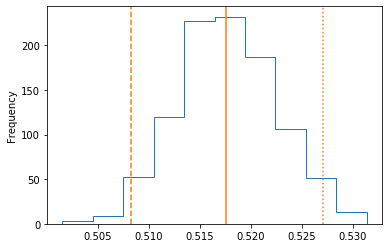

In [1]:
import math
import io
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats
import scipy.optimize
import scipy.spatial
largepoll = pd.read_csv('poll-larger.csv')
print(largepoll['vote'].value_counts(normalize=True))
def sample(O,n=1000):
    return pd.DataFrame({'vote': np.where(np.random.rand(n) < O,'Orgeron','Saban')})
def samplingdist(O,n=1000):
    return pd.DataFrame([sample(O,n)['vote'].value_counts(normalize=True) for i in range(1000)])
def quantiles(O,n=1000):
    distDF = samplingdist(O,n)
    return distDF['Orgeron'].quantile(0.025), distDF['Orgeron'].quantile(0.975)
distDF = samplingdist(0.5181,10000)
distDF['Orgeron'].plot(kind='hist', histtype='step')
plt.axvline(distDF['Orgeron'].quantile(0.025), c='C1',linestyle='--')
plt.axvline(distDF['Orgeron'].quantile(0.500), c='C1')
plt.axvline(distDF['Orgeron'].quantile(0.975), c='C1',linestyle=':')
print(f"a: The 95% confidence interval is {quantiles(.5181,10000)}")
print("b: The point estimate is .5181")
print("c: The margin of error is .1")
print("Orgeron is likely the winner with a 95% confidence interval")